## Medical Cost Personal Insurance Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression()
from sklearn import metrics


from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
Insurance_data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")

In [4]:
Insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
Insurance_data.shape

(1338, 7)

In [7]:
Insurance_data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [8]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
Insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
Insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


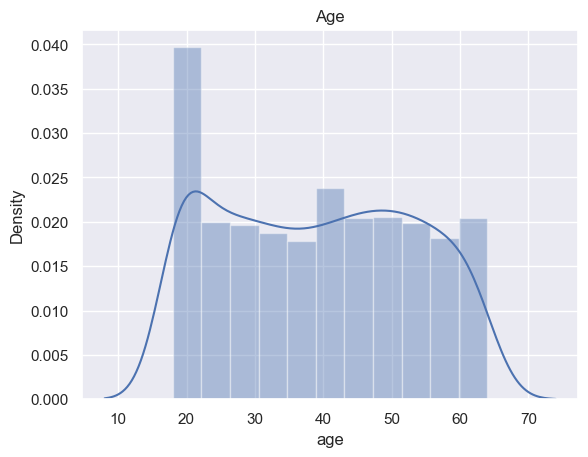

In [16]:
sns.set()
sns.distplot(Insurance_data['age'])
plt.title('Age')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

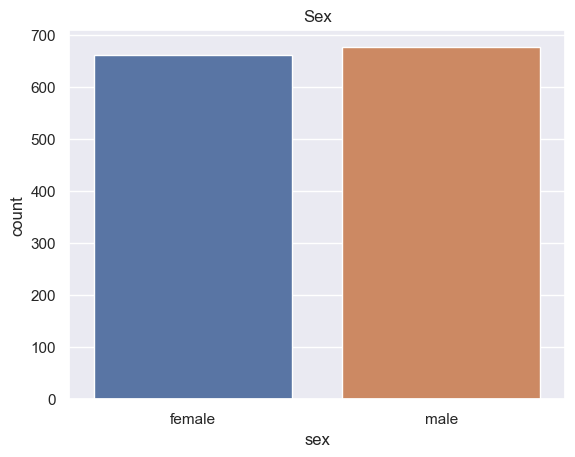

In [17]:
sns.countplot(x='sex',data=Insurance_data)
plt.title('Sex')
plt.show

In [19]:
Insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

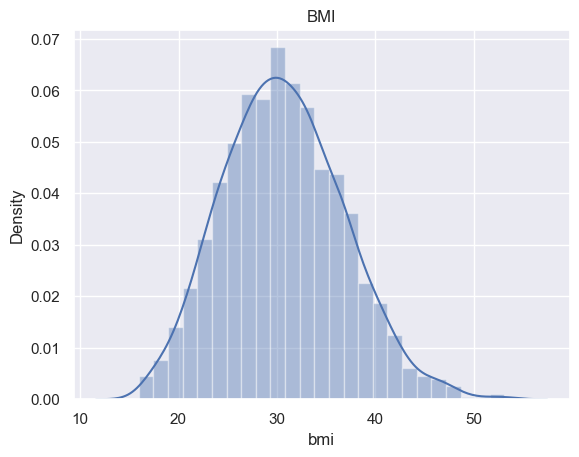

In [20]:
sns.distplot(Insurance_data['bmi'])
plt.title('BMI')
plt.show()

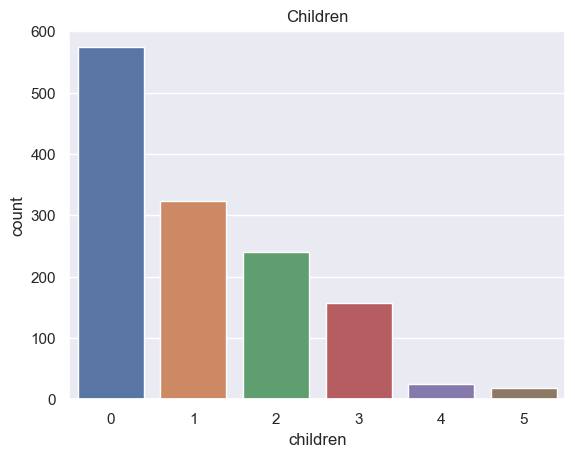

In [21]:
sns.countplot(x='children',data=Insurance_data)
plt.title('Children')
plt.show()

In [22]:
Insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

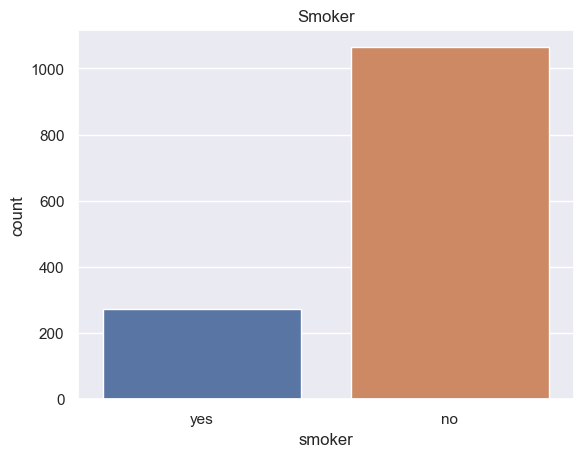

In [23]:
sns.countplot(x='smoker',data=Insurance_data)
plt.title('Smoker')
plt.show()

In [24]:
Insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

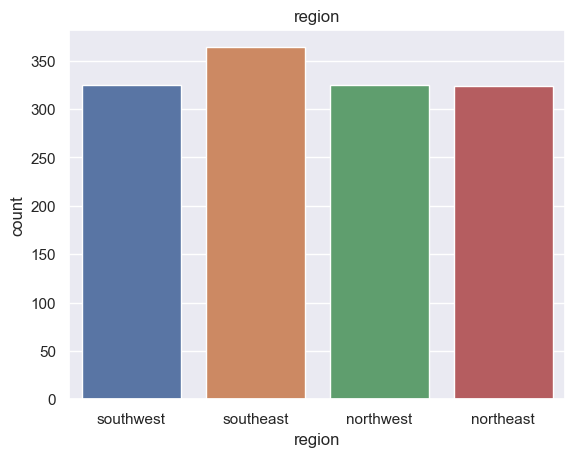

In [25]:
sns.countplot(x='region',data=Insurance_data)
plt.title('region')
plt.show()

In [26]:
Insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

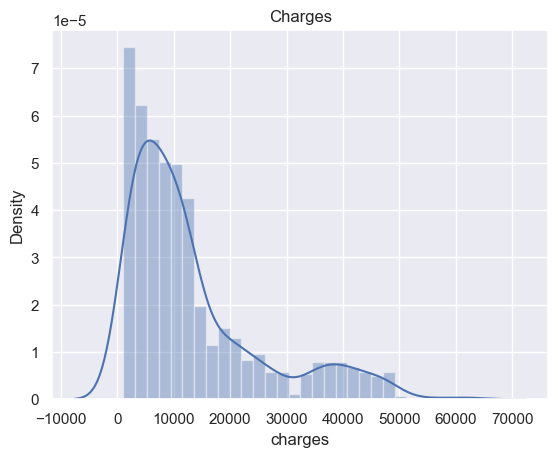

In [27]:
sns.distplot(Insurance_data['charges'])
plt.title('Charges')
plt.show()

In [30]:
#Changing the categorical features

Insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
Insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
Insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
Insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,3,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,3,2007.94500


In [36]:
#splitting X and y

X = Insurance_data.drop(columns='charges',axis=1)
Y = Insurance_data['charges']

In [37]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       3
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       3
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [38]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [79]:
#split in training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [80]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [81]:
#model training

model= LinearRegression()


In [82]:
model.fit(X_train , Y_train)

LinearRegression()

In [83]:
#model evaluation

training_data_pred = model.predict(X_train)

In [84]:
r2_train=metrics.r2_score(Y_train,training_data_pred)
print('R squared value :',r2_train)

R squared value : 0.7523545694621963


In [85]:
test_data_pred = model.predict(X_test)
r2_test=metrics.r2_score(Y_test,test_data_pred)
print('R squared value :',r2_test)

R squared value : 0.7390473426754218


In [86]:
# building predictive system

Input= (62,1,26.29,0,0,0)

Input_as_numpy = np.asarray(Input)
Input_reshape_data= Input_as_numpy.reshape(1,-1)

Prediction= model.predict(Input_reshape_data)
print(Prediction)

[35843.08765641]


In [87]:
Input= (19,1,27.9,0,0,1)

Input_as_numpy = np.asarray(Input)
Input_reshape_data= Input_as_numpy.reshape(1,-1)

Prediction= model.predict(Input_reshape_data)
print(Prediction)

[25236.61376167]


In [92]:
from sklearn.neighbors import KNeighborsRegressor

model_2= KNeighborsRegressor()

model_2.fit(X_train, Y_train)


KNeighborsRegressor()

In [93]:
training_data_pred = model_2.predict(X_train)

In [96]:
Input= (19,1,27.9,0,0,1)

Input_as_numpy = np.asarray(Input)
Input_reshape_data= Input_as_numpy.reshape(1,-1)

Prediction= model_2.predict(Input_reshape_data)
print(Prediction)

[8119.05126]


In [95]:
Input= (62,1,26.29,0,0,0)

Input_as_numpy = np.asarray(Input)
Input_reshape_data= Input_as_numpy.reshape(1,-1)

Prediction= model_2.predict(Input_reshape_data)
print(Prediction)

[24417.778722]


In [97]:
Input= (18,0,33.77,1,1,0)

Input_as_numpy = np.asarray(Input)
Input_reshape_data= Input_as_numpy.reshape(1,-1)

Prediction= model_2.predict(Input_reshape_data)
print(Prediction)

[3323.90519]
